In [36]:
import tensorflow as tf
from tensorflow import keras


In [15]:
fashion_mnist=keras.datasets.fashion_mnist

In [16]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [17]:
X_train_full.shape

(60000, 28, 28)

In [18]:
X_train_full.dtype

dtype('uint8')

In [23]:
"""On crée un jeu de validation, nous utilisons la descent de gradient donc mise à l'échelle.
on réduit les intensités de pixel à la plage 0-1 en les divisant par 255.0 (converti ainsi en float)"""

"On crée un jeu de validation, nous utilisons la descent de gradient donc mise à l'échelle.\non réduit les intensités de pixel à la plage 0-1 en les divisant par 255.0 (converti ainsi en float)"

In [24]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [25]:
"""On crée la liste des noms des classes"""
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [29]:
print(f"La première image du jeu d'entrainement représente un menteau : {class_names[y_train[0]]}")

La première image du jeu d'entrainement représente un menteau : Coat


# Créer le model avec l'API Sequential

In [31]:
"""VOici un MPC avec 2 couches cachées """
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))#softmax car classe exclusives

In [32]:
"""Autre manière de faire """
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics="accuracy")

In [43]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2245 - accuracy: 0.9194 - val_loss: 0.2942 - val_accuracy: 0.8952
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2211 - accuracy: 0.9211 - val_loss: 0.2974 - val_accuracy: 0.8968
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2181 - accuracy: 0.9215 - val_loss: 0.2985 - val_accuracy: 0.8958
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2144 - accuracy: 0.9222 - val_loss: 0.2993 - val_accuracy: 0.8890
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2112 - accuracy: 0.9235 - val_loss: 0.3444 - val_accuracy: 0.8740
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2076 - accuracy: 0.9253 - val_loss: 0.3086 - val_accuracy: 0.8960
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2044 - accuracy: 0.9267 - val_loss: 0.3186 - val_accuracy:

In [39]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

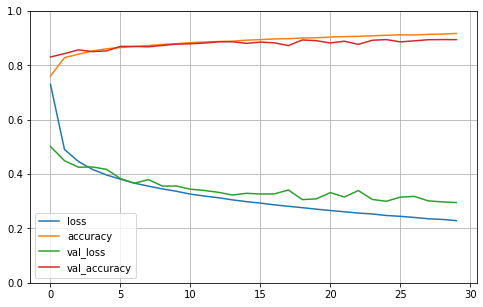

In [42]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Régler la plage verticale sur [0-1]
plt.show()

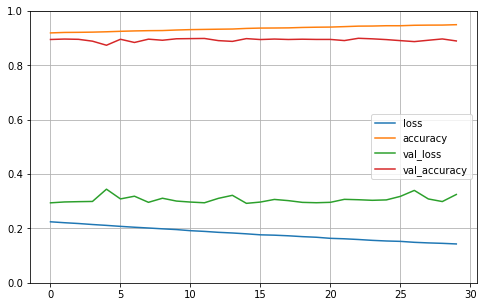

In [44]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Régler la plage verticale sur [0-1]
plt.show()

In [45]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 67.2060 - accuracy: 0.8608


[67.20600891113281, 0.86080002784729]

In [46]:
X_new=X_test[:3]

In [47]:
y_proba=model.predict(X_new)

In [48]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
y_pred=model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [51]:
y_pred

array([9, 2, 1], dtype=int64)

In [54]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')